In [134]:
import matplotlib.pyplot as plt
import networkx as nx


class UnionFind:
    def __init__(self, size: int):
        self.parent = list(range(size))
        self.rank = [0] * size
        self.count = size

    def _find(self, x: int) -> int:
        if self.parent[x] != x:
            self.parent[x] = self._find(self.parent[x]) 
        return self.parent[x]

    def union(self, x: int, y: int) -> None:
        root_x = self._find(x)
        root_y = self._find(y)

        if root_x != root_y:
            if self.rank[root_x] > self.rank[root_y]:
                self.parent[root_y] = root_x
            elif self.rank[root_x] < self.rank[root_y]:
                self.parent[root_x] = root_y
            else:
                self.parent[root_y] = root_x
                self.rank[root_x] += 1
            self.count -= 1

    def get_count(self) -> int:
        return self.count

    def plot_network(self) -> None:
        G = nx.Graph()
        for i in range(len(self.parent)):
            if self.parent[i] != i:
                G.add_edge(i, self.parent[i])

        for i in range(len(self.parent)):
            if self.parent[i] == i:
                G.add_node(i)

        pos = nx.spring_layout(G, k=5, iterations=500)
        nx.draw(
            G,
            pos,
            with_labels=True,
            node_size=700,
            node_color="lightblue",
            font_size=12,
        )
        plt.show()


In [135]:
def test_union_find(uf: UnionFind, x: int, y: int) -> None:
    uf.union(x, y)
    print(f"Current rank: {uf.rank}")
    print(f"Current parent: {uf.parent}")
    print(f"Current count: {uf.count}")
    uf.plot_network()
    

In [136]:
uf = UnionFind(10)


Current rank: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Current parent: [0, 0, 2, 3, 4, 5, 6, 7, 8, 9]
Current count: 9


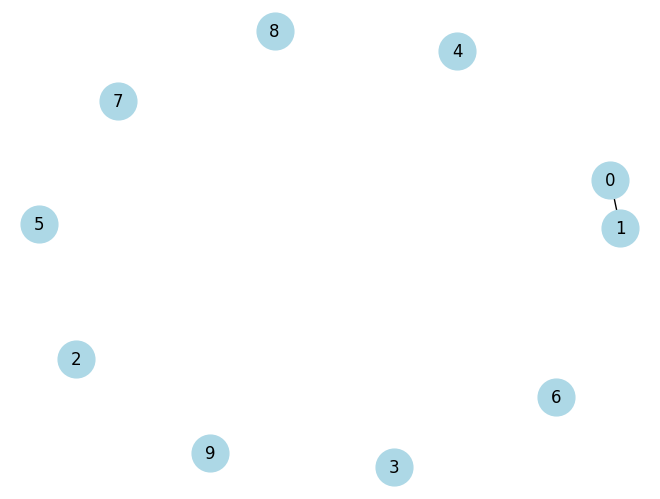

In [137]:
test_union_find(uf, 0, 1)


Current rank: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Current parent: [0, 0, 0, 3, 4, 5, 6, 7, 8, 9]
Current count: 8


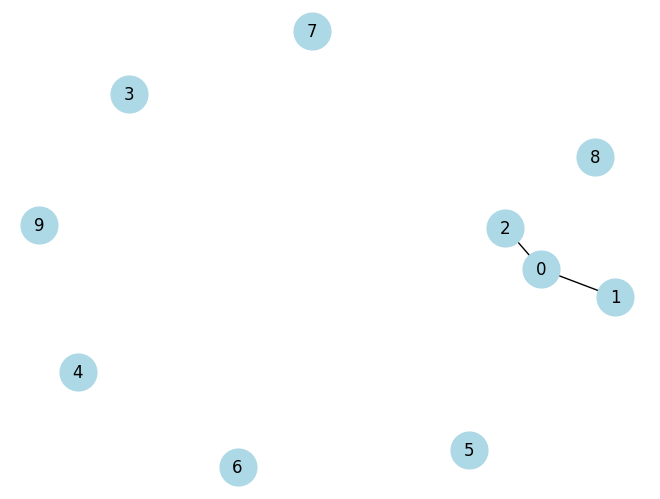

In [138]:
test_union_find(uf, 1, 2)


Current rank: [1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Current parent: [0, 0, 0, 3, 3, 5, 6, 7, 8, 9]
Current count: 7


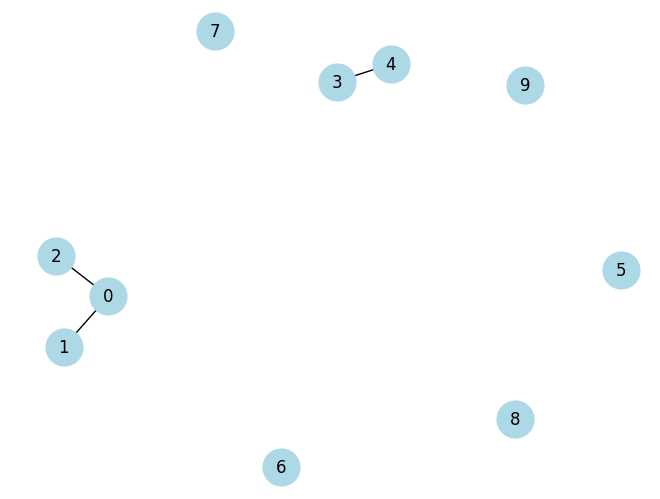

In [139]:
test_union_find(uf, 3, 4)


Current rank: [2, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Current parent: [0, 0, 0, 0, 3, 5, 6, 7, 8, 9]
Current count: 6


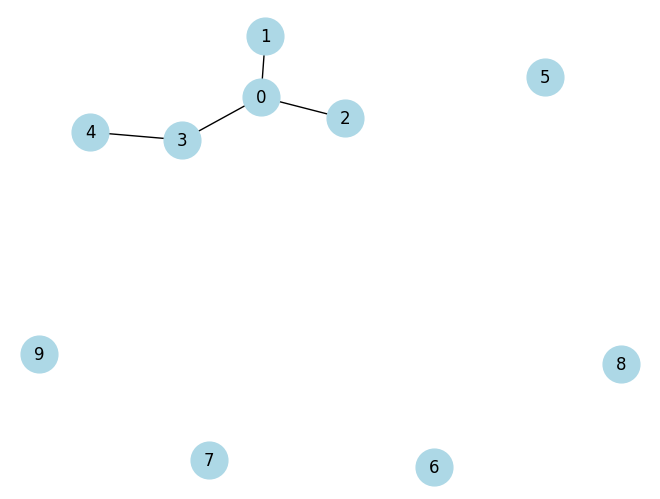

In [140]:
test_union_find(uf, 0, 4)


Current rank: [2, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Current parent: [0, 0, 0, 0, 3, 0, 6, 7, 8, 9]
Current count: 5


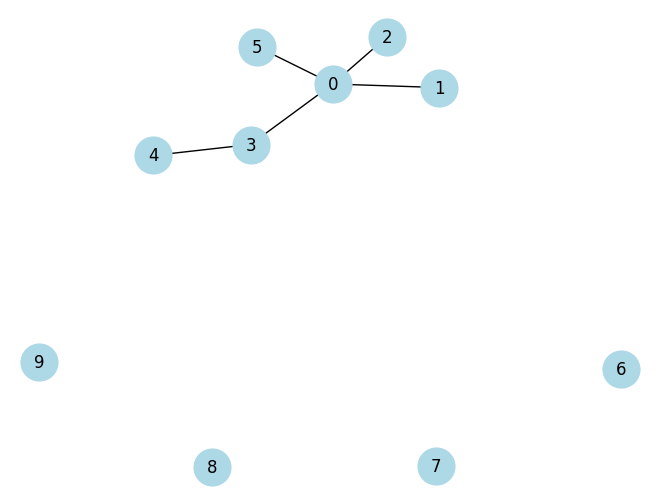

In [141]:
test_union_find(uf, 0, 5)


Current rank: [2, 0, 0, 1, 0, 0, 1, 0, 0, 0]
Current parent: [0, 0, 0, 0, 3, 0, 6, 6, 8, 9]
Current count: 4


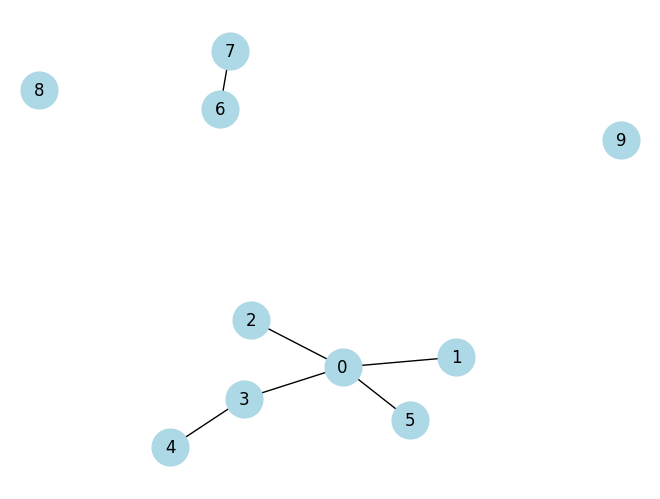

In [142]:
test_union_find(uf, 6, 7)


Current rank: [2, 0, 0, 1, 0, 0, 1, 0, 1, 0]
Current parent: [0, 0, 0, 0, 3, 0, 6, 6, 8, 8]
Current count: 3


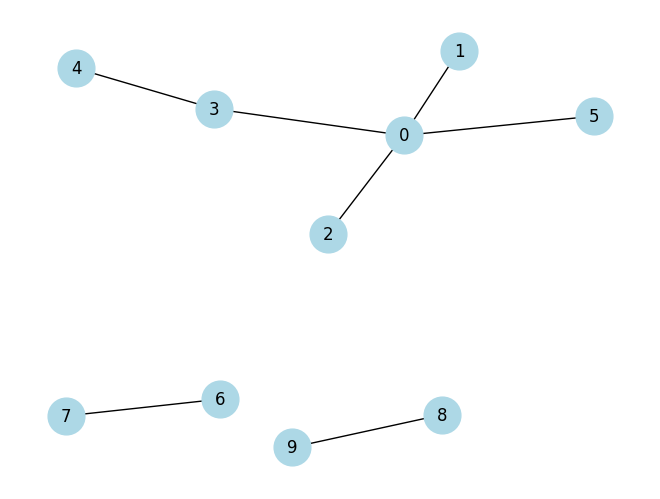

In [143]:
test_union_find(uf, 8, 9)


Current rank: [2, 0, 0, 1, 0, 0, 2, 0, 1, 0]
Current parent: [0, 0, 0, 0, 3, 0, 6, 6, 6, 8]
Current count: 2


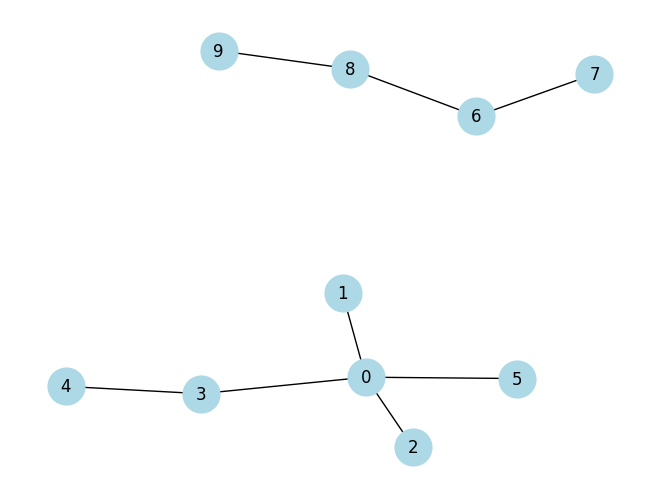

In [144]:
test_union_find(uf, 6, 8)


Current rank: [3, 0, 0, 1, 0, 0, 2, 0, 1, 0]
Current parent: [0, 0, 0, 0, 3, 0, 0, 6, 6, 6]
Current count: 1


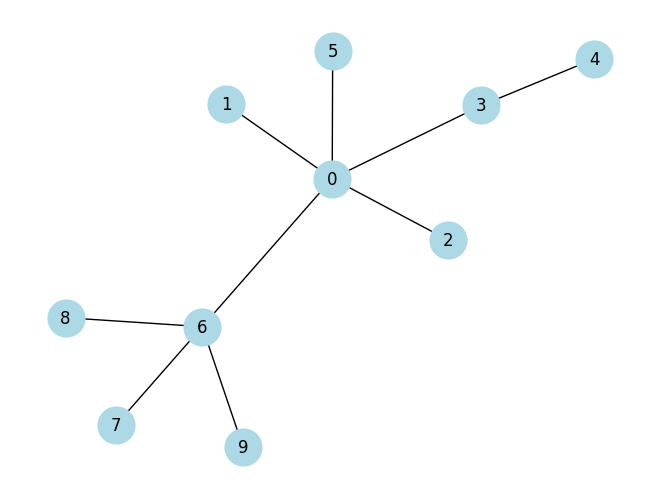

In [145]:
test_union_find(uf, 0, 9)
